In [140]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import os
from matplotlib import cm

In [155]:
def read_logs(logdirs, plot=True, scale=0.9, left_req="", right_req="", \
              repeat_colors=False):
    dfs = {}
    if repeat_colors:
        colors = {}
    maximum_keys = []
    for logdir in logdirs:
        if os.path.isfile(logdir+"/log.csv"):
            if repeat_colors:
                col_label = logdir[logdir.find(left_req)+len(left_req):\
                                   logdir.find(right_req)]
                colors[logdir] = col_label
            log = pd.read_csv(logdir+"/log.csv")
            dfs[logdir] = log
            if len(log.columns) > len(maximum_keys):
                maximum_keys = log.columns 
        else:
            print("Skip", logdir)
    if repeat_colors:
        clist = iter(cm.rainbow(np.linspace(0, 1, len(set(colors.values())))))
        cdict = {key:color for key, color in zip(list(set(colors.values())), clist)}
        print(colors)
        print(cdict)
        colors = {key:cdict[colors[key]] for key in colors}
        
    keys = ["t", "bleu", "rouge_l", "meteor"]
    for logdir in dfs:
        if 100000 in dfs[logdir]["t"].values:
            df_logd = dfs[logdir]
            print(logdir)
            print(df_logd[keys][(df_logd["t"]==100000)|(df_logd["t"]==200000)])
    if plot:
        for key in maximum_keys:
            if key != "t":
                max_ = 0
                for logdir in dfs:
                    if key in dfs[logdir]:
                        mask = (~ dfs[logdir][key].isnull()) & (dfs[logdir]["t"]!=100000) & \
                               (dfs[logdir]["t"] != 200000)
                        if not repeat_colors:
                            plt.plot(dfs[logdir]["t"][mask], dfs[logdir][key][mask], \
                                     label=logdir)
                        else:
                            plt.plot(dfs[logdir]["t"][mask], dfs[logdir][key][mask], 
                                     label=logdir, c=colors[logdir])
                        max_ = max(max_, np.max(dfs[logdir][key][mask].values))
                plt.title(key)
                plt.legend(loc=(1, 0))
                plt.show()
                for logdir in dfs:
                    if key in dfs[logdir]:
                        mask = (~ dfs[logdir][key].isnull()) & (dfs[logdir]["t"]!=100000) & \
                               (dfs[logdir]["t"] != 200000)
                        if not repeat_colors:
                            plt.plot(dfs[logdir]["t"][mask], dfs[logdir][key][mask], \
                                     label=logdir)
                        else:
                            plt.plot(dfs[logdir]["t"][mask], dfs[logdir][key][mask], \
                                     label=logdir, c=colors[logdir])
                        plt.ylim(max_*scale, max_)
                plt.title(key)
                plt.legend(loc=(1, 0))
                plt.show()
    return dfs

Skip logs/july/reposplit_trycomb/train.py-nopunct_norelattn-07-06-16:11:19-fddih
Skip logs/july/reposplit_trycomb/train.py-nopunct_norelattn-07-06-16:11:28-nfhgc
Skip logs/july/reposplit_trycomb/train.py-nopunct_norelattn-07-06-16:18:01-xilcw
Skip logs/july/reposplit_trycomb/train.py-nopunct_norelattn-07-06-16:18:07-lbyoy
Skip logs/july/reposplit_trycomb/train.py-nopunct_seqrelattn-07-06-16:11:19-rphqv
Skip logs/july/reposplit_trycomb/train.py-nopunct_seqrelattn-07-06-16:11:28-wzoya
Skip logs/july/reposplit_trycomb/train.py-nopunct_seqrelattn-07-06-16:17:54-ftdbv
Skip logs/july/reposplit_trycomb/train.py-nopunct_seqrelattn-07-06-16:17:58-tiboq
Skip logs/july/reposplit_trycomb/train.py-nopunct_seqrelattn-07-06-16:19:42-nsmqd
Skip logs/july/reposplit_trycomb/train.py-nopunct_seqrelattn-07-06-16:20:26-igeln
logs/july/reposplit_trycomb/train.py-nopunct_norelattn-07-06-16:21:05-untuv
          t       bleu    rouge_l     meteor
150  100000  40.140674  46.882763  24.269895
151  200000  40.73

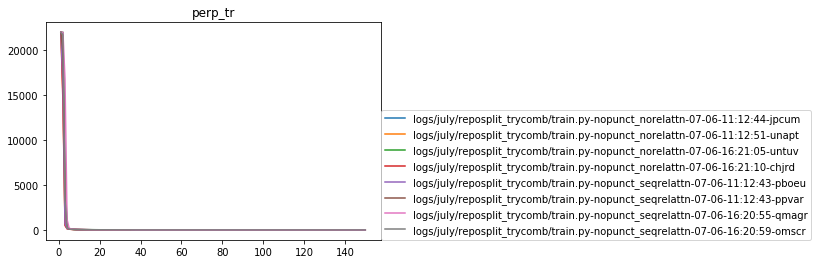

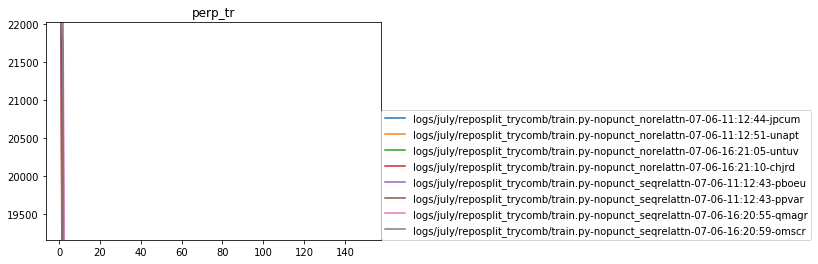

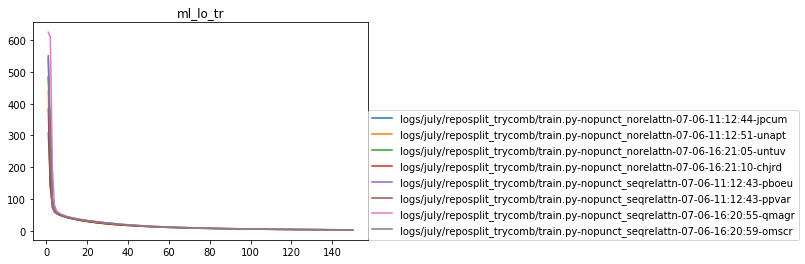

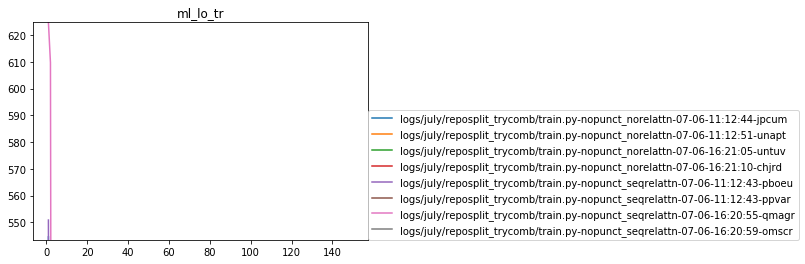

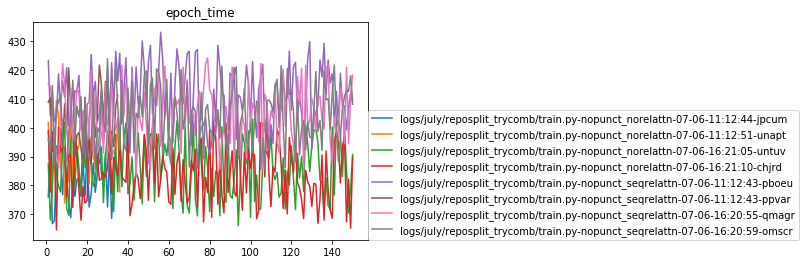

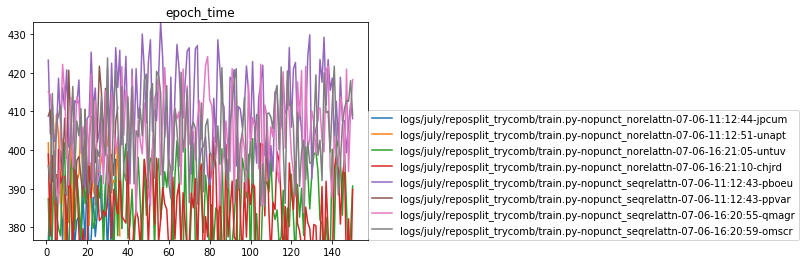

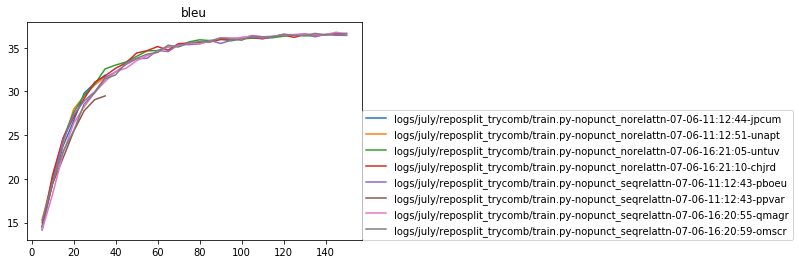

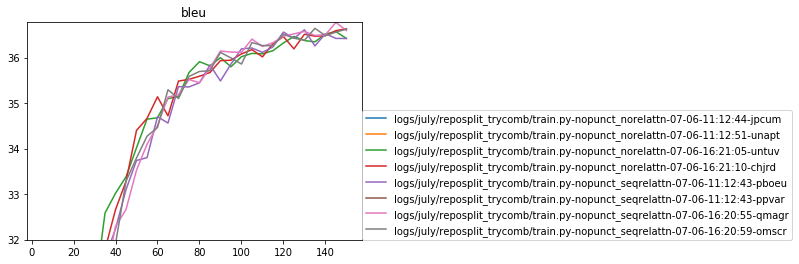

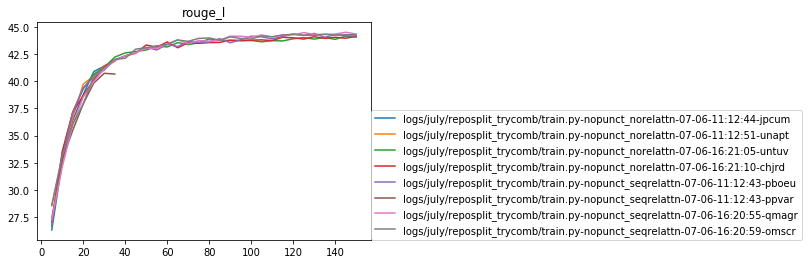

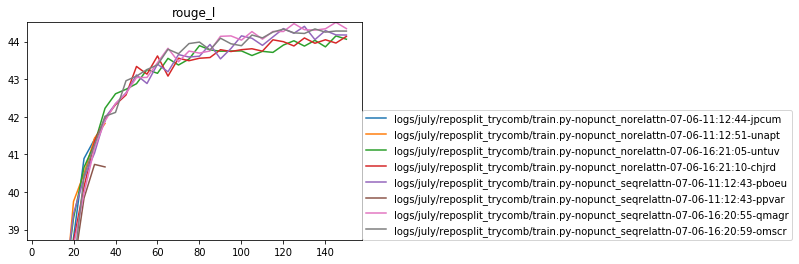

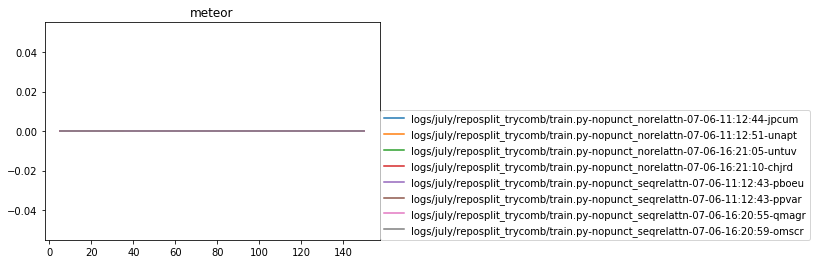

/Vol0/user/hse/nadiinchi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


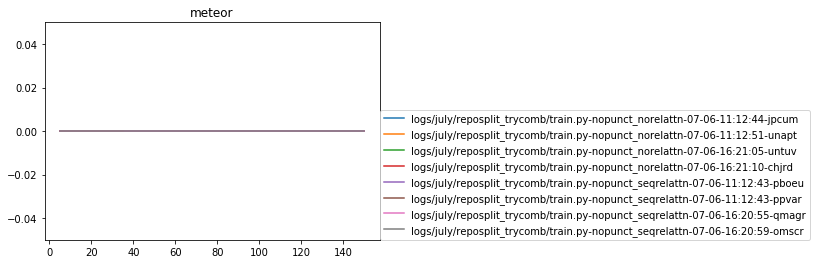

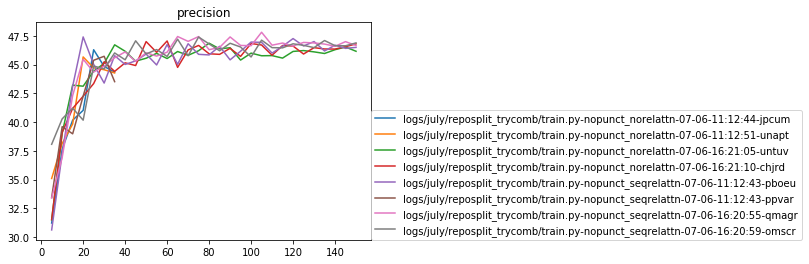

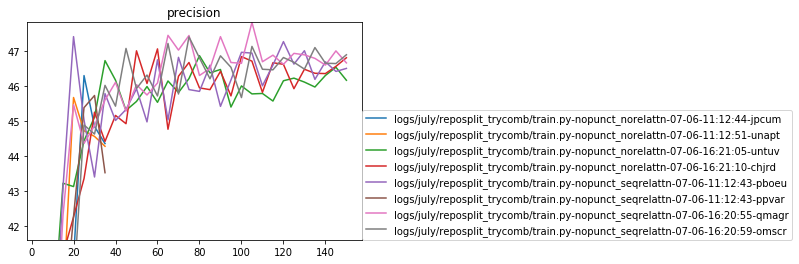

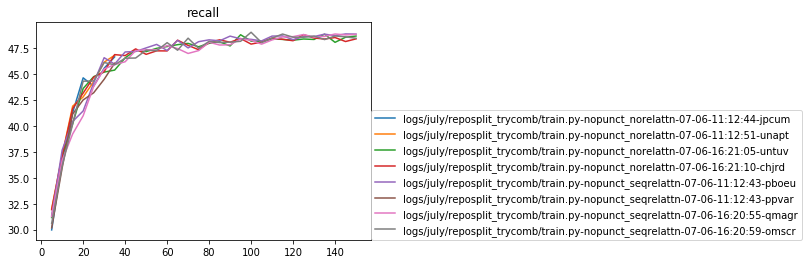

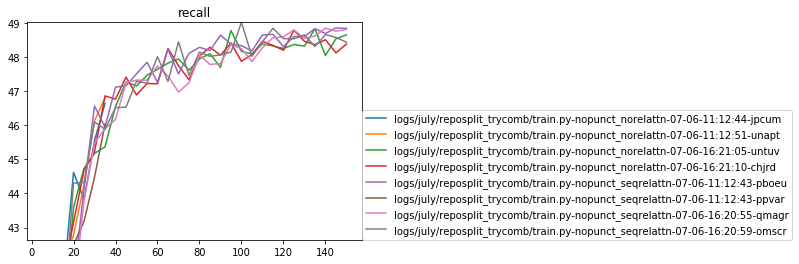

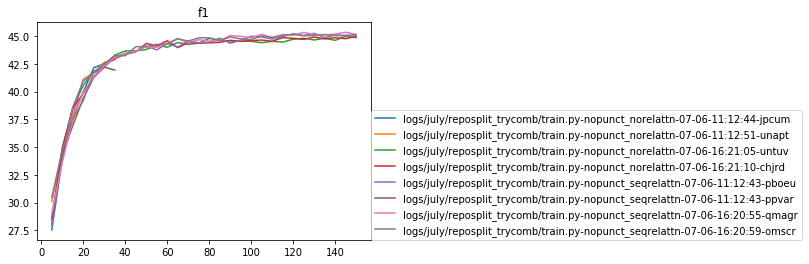

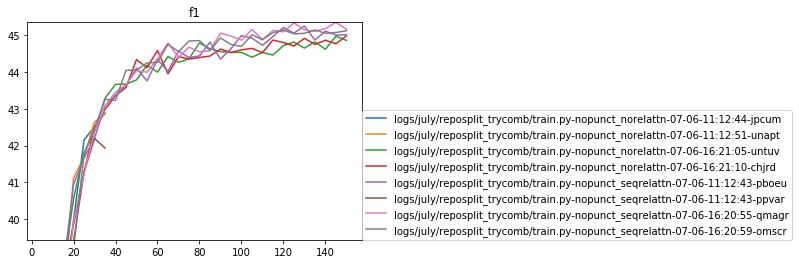

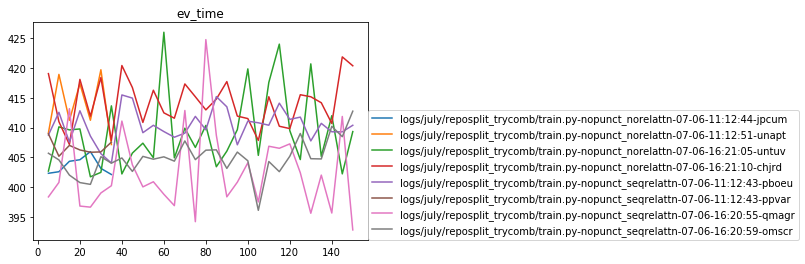

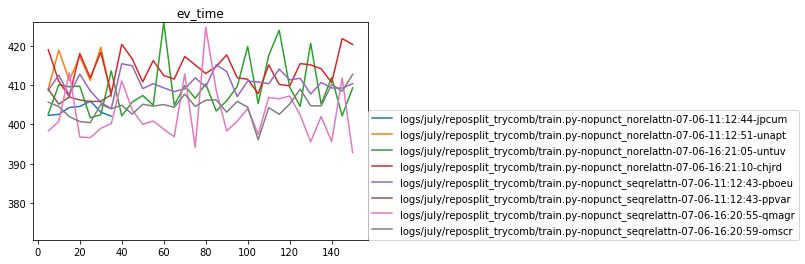

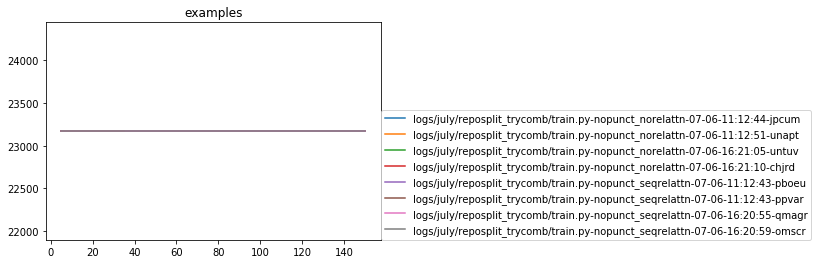

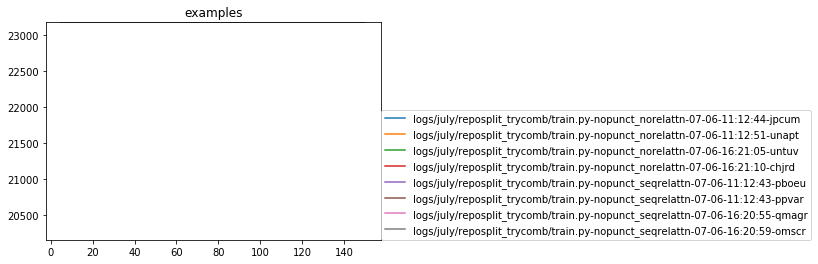

In [174]:
basedir = "logs/july/reposplit_trycomb/"
logdirs = sorted([basedir+folder for folder in os.listdir(basedir)\
                  if not "ipynb" in folder if "nopunct" in folder])
logs = read_logs(logdirs, scale=0.87)